In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as snp
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Virat_Kohli.csv')
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [3]:
df.shape

(132, 11)

In [4]:
df.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [5]:
df['Pos'] = df['Pos'].astype(int)

1 . The dataset contains matches played by Virat Kohli between 18 August 2008 and 22 January 2017. Find total runs scored by Virat Kohli

In [6]:
df['Runs'].sum()

6184

2 . Find average of Virat Kohli during the same period 

In [7]:
# Average of runs
avg = df['Runs'].mean()
avg

46.84848484848485

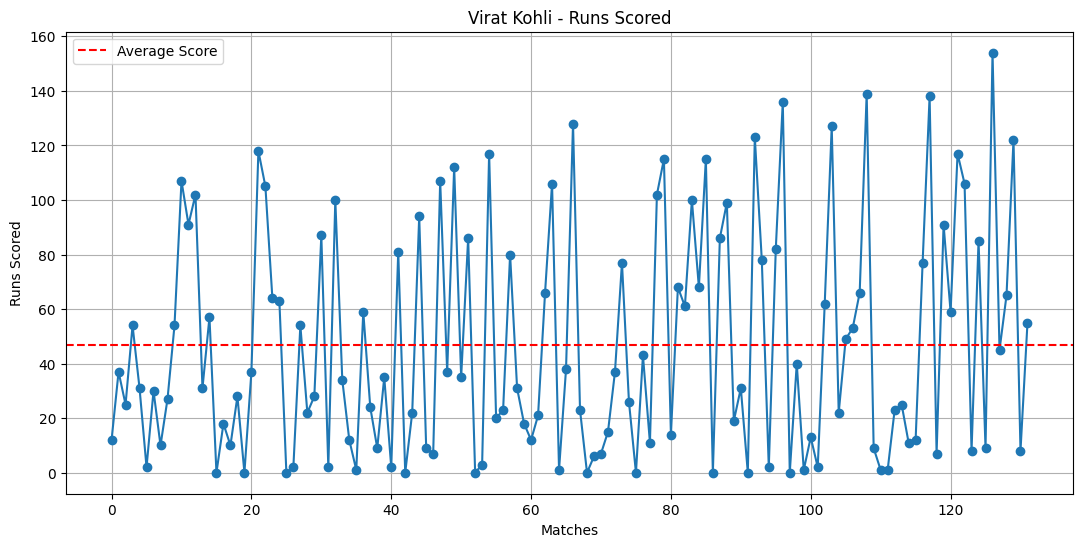

In [8]:
matches = df.index
scores = df['Runs']
plt.figure(figsize=(13, 6))
plt.plot(matches, scores, marker='o', linestyle='-')
plt.axhline(y=avg, color='r', linestyle='--', label='Average Score')
plt.xlabel('Matches'),plt.ylabel('Runs Scored'),plt.title('Virat Kohli - Runs Scored')
plt.legend()
plt.grid(True)
plt.show()

3 . look at the trend of runs scored by Virat Kohli in his career from 18 August 2008 to 22 January 2017

In [9]:
trace = go.Scatter(x=df.index, y=df['Runs'], mode='lines+markers')
layout = go.Layout(title='Virat Kohli - Runs Scored Trend (2008-2017)',xaxis=dict(title='Date',showgrid=True),yaxis=dict(title='Runs Scored'))
fig = go.Figure(data=[trace],layout=layout)
fig.show()

4 . Find all the batting positions played by Virat Kohli

In [10]:
# find unique value from position colum
position = df['Pos'].unique()
position

array([2, 1, 7, 4, 3, 5, 6])

In [11]:
# unique value count in position column
val_cnt = df['Pos'].value_counts()
val_cnt

Pos
3    91
4    28
2     3
1     3
7     3
5     3
6     1
Name: count, dtype: int64

5 . Create pie chart of above analyzed data 

In [12]:
# data for pie chart
lable = val_cnt.index
size = val_cnt

# shoe pie chart
fig = px.pie(values=size,names=lable,title='Virat kohli batting position')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [13]:
# 3 number has higher betting position in value

6 . look at the total runs scored by Virat Kohli in different positions

In [14]:
totla_run = df.groupby('Pos')['Runs'].sum()
totla_run

Pos
1     110
2      51
3    4477
4    1370
5     123
6      23
7      30
Name: Runs, dtype: int64

In [15]:
# data for pie chart
lable = totla_run.index
size = totla_run

# shoe pie chart
fig = px.pie(values=size,names=lable,title='Virat kohli batting position run total')
fig.update_traces(textposition='outside', textinfo='value')
fig.show()

In [16]:
# 3 number has higher betting position in score

7 .  find out the number of centuries scored by Virat Kohli while batting in the first innings and second innings

In [17]:
# Filtering Data for Runs Greater Than or Equal to 100
cent = df.query("Runs>= 100")

In [18]:
first_ins = df[(df['Inns']==1) & (df['Runs']>=100)].sum()
first_ins['Inns']

8

In [19]:
cent['Inns'].unique()

array([2, 1], dtype=int64)

In [20]:
cent['Inns'].value_counts()

Inns
2    15
1     8
Name: count, dtype: int64

In [21]:
srcond_ins = df[(df['Inns']==2) & (df['Runs']>=100)].sum()
srcond_ins['Inns']

30

In [22]:
# show bar chart
fig = px.bar(cent,x=cent['Inns'],y=cent['Runs'],title='centuries scored by Virat Kohli')
fig.show()

In [23]:
# score is more in the second innings

8 . Find the kind of dismissals Virat Kohli faced most of the time

In [24]:
diss = df['Dismissal'].value_counts()
diss

Dismissal
caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: count, dtype: int64

In [25]:
# data for pie chart
lable = diss.index
size = diss

# shoe pie chart
fig = px.pie(values=size,names=lable,title='Virat kohli dismissals')
fig.update_traces(textposition='outside', textinfo='value')
fig.show()

In [26]:
# caught dismissals Virat Kohli faced most of the time

9 . Find out against which team Virat Kohli scored most of his runs

In [27]:
df['Opposition'].value_counts()

Opposition
v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: count, dtype: int64

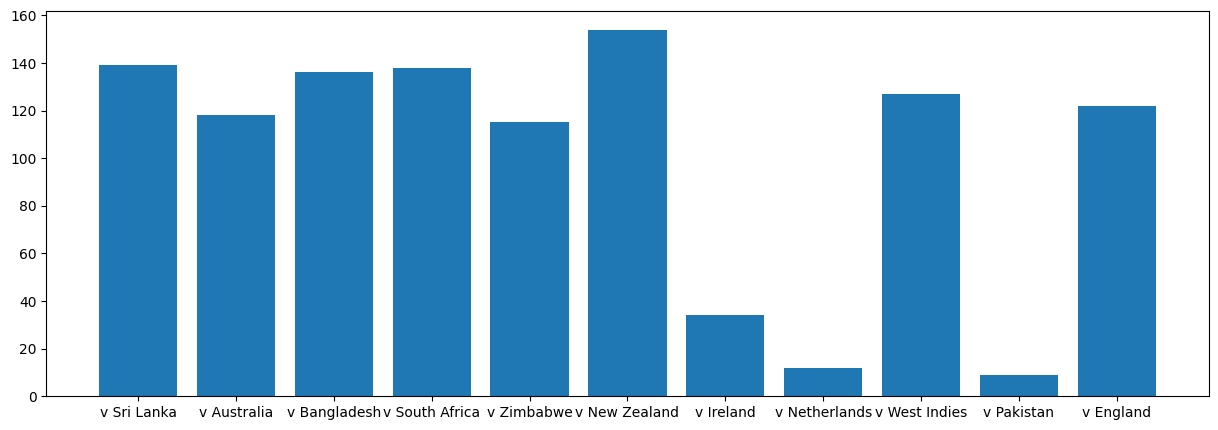

In [28]:
plt.figure(figsize=(15,5))
plt.bar(x=df['Opposition'],height=df['Runs'])
plt.show()

In [29]:
# v sri lanka team Virat Kohli scored most of his runs

10 . Find out against which team Virat Kohli scored most of his centuries

In [30]:
cent['Opposition'].value_counts()

Opposition
v Australia       5
v Sri Lanka       4
v Bangladesh      3
v New Zealand     3
v England         3
v West Indies     3
v Zimbabwe        1
v South Africa    1
Name: count, dtype: int64

In [31]:
fig = px.bar(cent,x=cent['Opposition'],y=cent['Runs'])
fig.show()

In [32]:
# v Australia  team Virat Kohli scored most of his centuries

11 . let’s analyze Virat Kohli’s strike rate.

In [33]:
avg = df['SR'].mean()

12 . let’s see whether Virat Kohli plays with high strike rates in the first innings or second innings

In [34]:
stri = df.query('SR>=120')

13 . Find the relationship between runs scored by Virat Kohli and fours played by him in each innings

In [35]:
fig = px.bar(stri,x=stri['Inns'],y=stri['SR'],title='Virat kohli Rates Inning')
fig.show()

In [36]:
figure = px.scatter(data_frame=df, x=df["Runs"], y=df["4s"],title="Relationship Between Runs Scored and Fours")
figure.show()

In [37]:
figure = px.scatter(data_frame = df, x="Runs",y="6s", size="SR", title= "Relationship Between Runs Scored and Sixes")
figure.show()